In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("D:/data sets/MNIST/mnist_train.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
l = data['label']

In [8]:
d = data.drop('label', axis=1)

In [9]:
d.shape

(60000, 784)

In [10]:
l.shape

(60000,)

C:\Users\91998\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


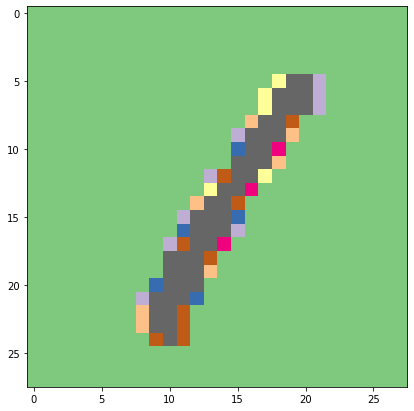

In [11]:
plt.figure(figsize=(7,7))
idx=3

grid_data = d.iloc[idx].as_matrix().reshape(28,28)#reshape from 1d to 2d pixel
plt.imshow(grid_data, interpolation = 'none', cmap = 'Accent')
plt.show()


#### 2d Visualization using PCA

In [16]:
labels = l.head(15000)
labels.shape

(15000,)

In [15]:
dataf = d.head(15000)
dataf.shape

(15000, 784)

In [30]:
## Standardizing data
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(dataf)
standarized_data.shape


(15000, 784)

In [10]:
#co-varinace of matrix
sample_data = standarized_data
cov_matrix = np.matmul(sample_data.T, sample_data)

cov_matrix.shape

(784, 784)

In [11]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

values, vectors = eigh(cov_matrix, eigvals=(782,783))
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [12]:
# projecting the original data sample on the plane formed by two principal eigen vectors by vector-vector multiplication.

new_cord = np.matmul(vectors, sample_data.T)
new_cord.shape

(2, 15000)

In [14]:
new_cord = np.vstack((new_cord,labels)).T

dataframe = pd.DataFrame(data=new_cord, columns = ("1st_principal", "2nd_principal", "label"))
dataframe.head()

,1st_principal,2nd_principal,label
0,-4.457050,0.960769,5.0
1,-7.397795,-8.658155,0.0
2,9.640690,-2.082854,4.0
3,-3.356074,7.187465,1.0
4,2.979880,4.933889,9.0


C:\Users\91998\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


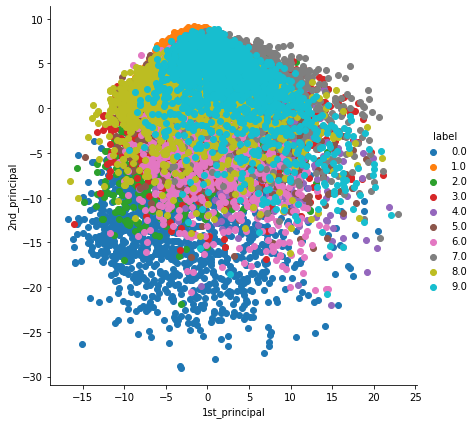

In [15]:
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

#PCA using scikit learn

In [17]:
from sklearn import decomposition
pca = decomposition.PCA()

In [18]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


In [28]:
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

ValueError: Shape of passed values is (15000, 785), indices imply (15000, 3)

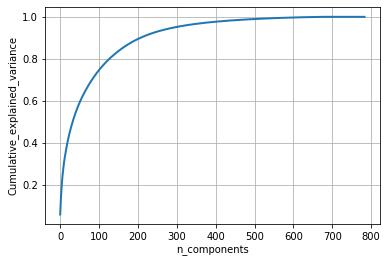

In [27]:
# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


Tsne

C:\Users\91998\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


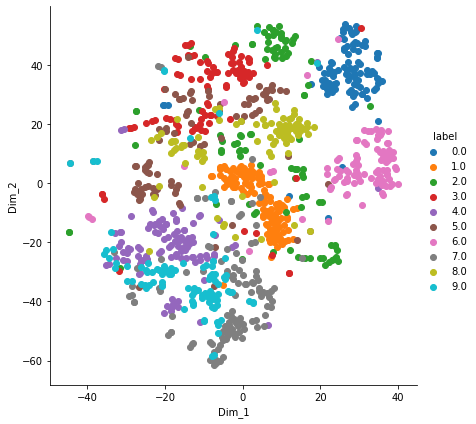

In [33]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standarized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\91998\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


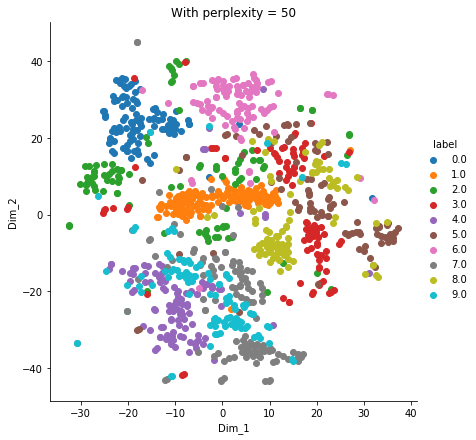

In [37]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

C:\Users\91998\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


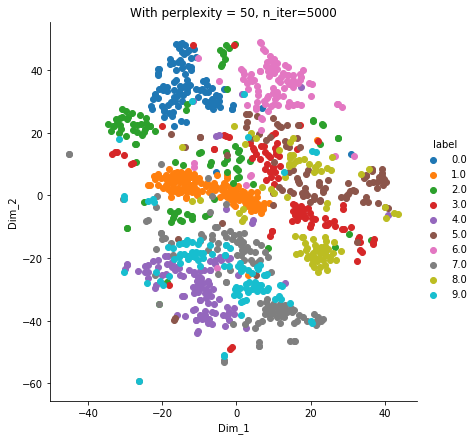

In [39]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

C:\Users\91998\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


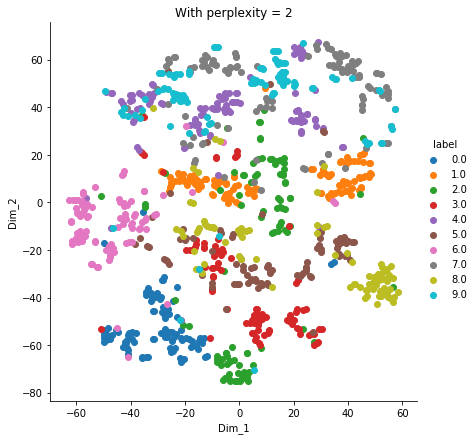

In [40]:
model = TSNE(n_components=2, random_state=0, perplexity=10)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

ERROR: unknown command "jupyter"

